In [42]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.datasets import make_regression

In [43]:
X, Y = make_regression(n_samples=100, n_features=1, random_state=42, noise=5)

In [44]:
X = torch.from_numpy(X.astype(np.float32))
Y = torch.from_numpy(Y.astype(np.float32))

In [45]:
Y = Y.reshape(-1, 1)

In [46]:
X.shape, Y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

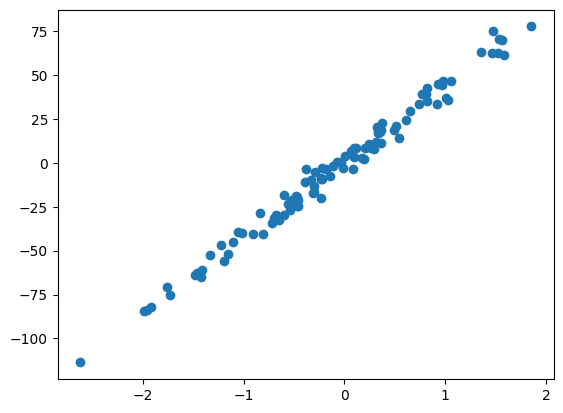

In [47]:
import matplotlib.pyplot as plt

plt.scatter(X.reshape(100, -1), Y.reshape(100, -1))
plt.show()

In [51]:
learning_rate = 0.1
model = nn.Linear(X.shape[1], Y.shape[1])
loss_function = nn.MSELoss()
print(list(model.parameters()))
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

[Parameter containing:
tensor([[-0.4903]], requires_grad=True), Parameter containing:
tensor([-0.9411], requires_grad=True)]


In [52]:
epochs = 1000
for epoch in range(epochs):
    Y_pred = model.forward(X)
    loss = loss_function(Y_pred, Y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 10 == 0:
        print(f"loss : {loss.item()}")

loss : 1579.2340087890625
loss : 64.69049072265625
loss : 20.974468231201172
loss : 19.562410354614258
loss : 19.515209197998047
loss : 19.51361656188965
loss : 19.513561248779297
loss : 19.513559341430664
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.513561248779297
loss : 19.5135

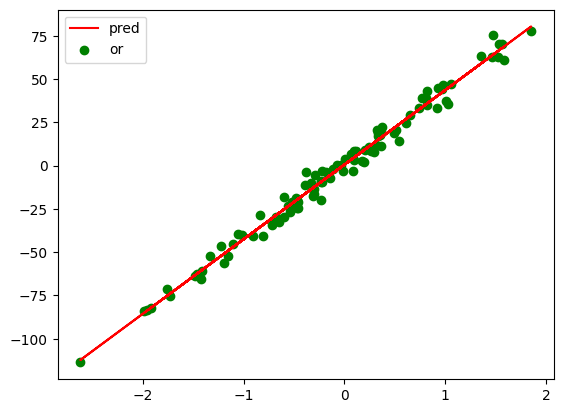

In [61]:
Y_pred = model.forward(X).detach()
plt.scatter(X.reshape(-1, 100), Y.reshape(-1, 100), color='green',label='or')
plt.plot(X.reshape(-1, 100)[0], Y_pred.reshape(-1, 100)[0], color='red',label='pred')
plt.legend()
plt.show()